In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# LR Module
import statsmodels.formula.api as smf

# QQ Plot + Linearity in Parameter
import statsmodels.api as sm

In [3]:
# Treating Outliers

from statsmodels.graphics.regressionplots import influence_plot

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Data & Preprocessing the Data

In [5]:
start = pd.read_csv('50_Startups.csv')

In [6]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# No Missing Values

In [9]:
# duplicates ?
start[start.duplicated()].shape

(0, 5)

In [ ]:
# no duplicates

In [ ]:
# outliers by cooks distance

In [10]:
# Rename the columns

startup=start.rename(columns={'R&D Spend':'RnD_Spend','Marketing Spend':"Marketing_Spend"})

In [11]:
startup.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Creating the Model

In [12]:
startup.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

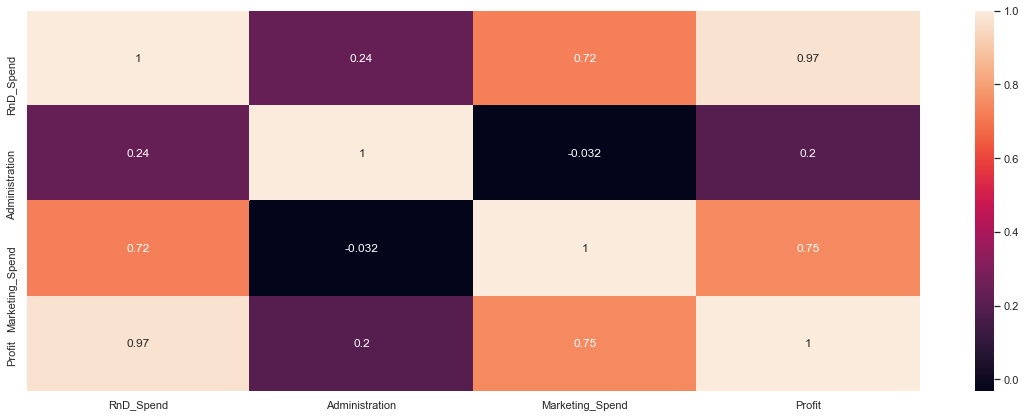

In [13]:
plt.figure(figsize=(20,7))
sns.heatmap(startup.corr(),annot=True)

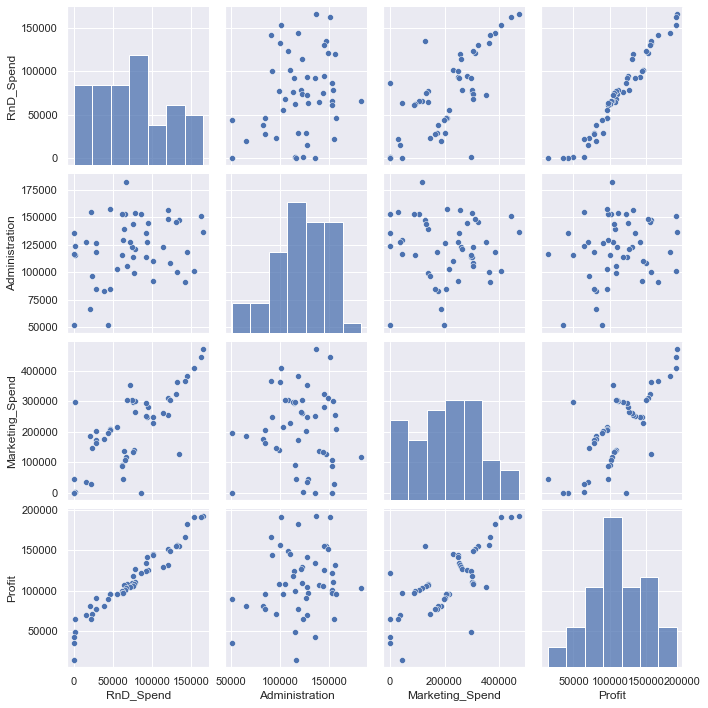

In [14]:
sns.pairplot(startup)

In [ ]:
# there is strong positive corelation between Profit & R&D Spend

### Creating A Model

In [15]:
model = smf.ols('Profit~ RnD_Spend+Administration+Marketing_Spend',data=startup).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        13:40:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# p value for Administration & Marketing_Spend is against our assumption
# creating ind model 
model_admin = smf.ols('Profit~Administration',data=startup).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.162
Time:                        13:40:21   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model_mkt = smf.ols('Profit~Marketing_Spend',data=startup).fit()
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        13:40:24   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_am = smf.ols('Profit~Administration+Marketing_Spend',data=startup).fit()
model_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.50e-10
Time:                        13:40:27   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_Spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# p values are very less

### Collinearity

In [ ]:
# Profit~ RnD_Spend+Administration+Marketing_Spend

In [20]:
r_rd  = smf.ols('RnD_Spend~Administration+Marketing_Spend',data=startup).fit().rsquared
vif_rd = 1/(1-r_rd)

r_ad  = smf.ols('Administration~RnD_Spend+Marketing_Spend',data=startup).fit().rsquared
vif_ad = 1/(1-r_ad)

r_m  = smf.ols('Marketing_Spend~RnD_Spend+Administration',data=startup).fit().rsquared
vif_m = 1/(1-r_m)

vif_df = pd.DataFrame({'Variables':['RnD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_m]})
vif_df

,Variables,VIF
0,RnD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [ ]:
# VIF values are less - consider all variables for predicting 

### Residual Analysis

Text(0.5, 1.0, ' QQ Plot For checking Normality of Residual')

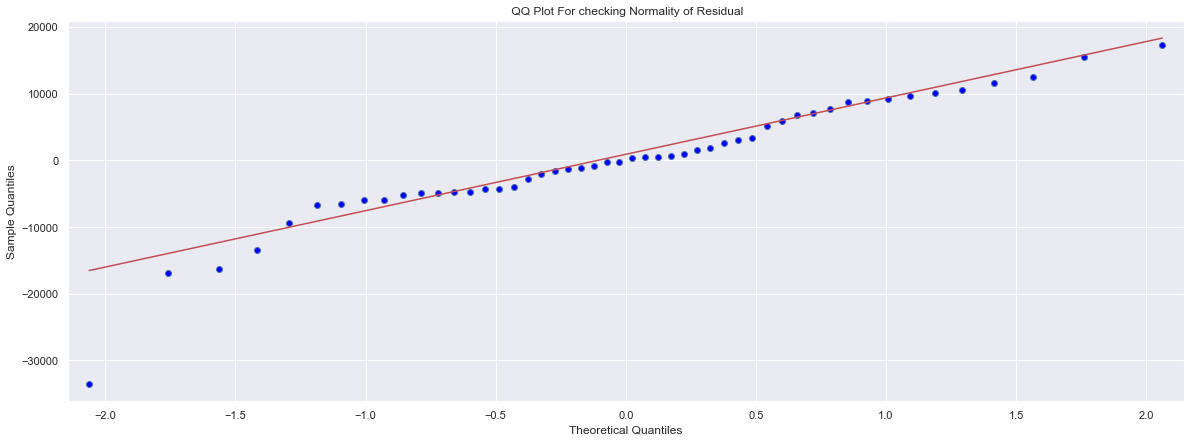

In [21]:
fig,ax = plt.subplots(figsize=(20,7))
qqplots = sm.qqplot(model.resid,line='q',ax=ax)

plt.title(' QQ Plot For checking Normality of Residual')

In [22]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [23]:
# Test for Homoscedasticity or Heteroscedasticity - resid vs predicted/fitted value

def std_val(values):
    return (values-values.mean())/values.std()

Text(0.5, 1.0, 'Checking for Homoscedasticity')

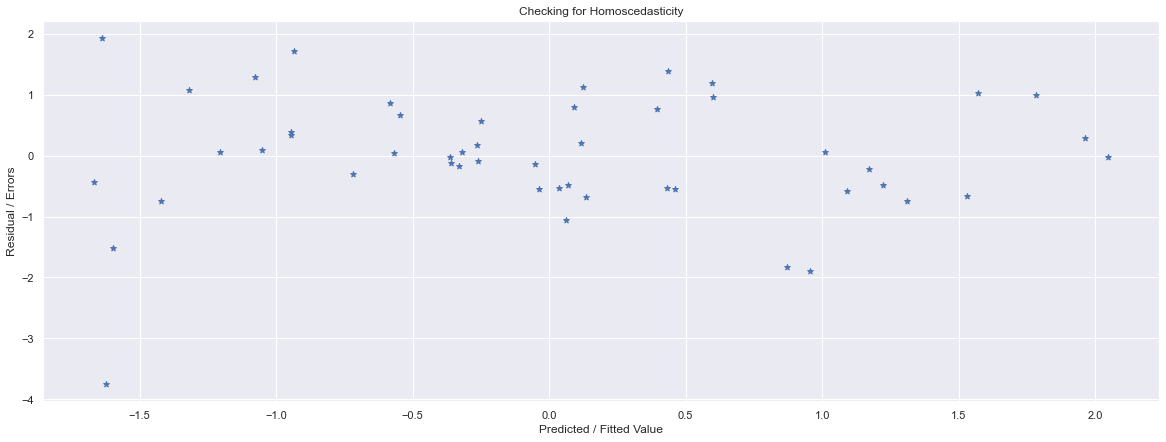

In [24]:
## checking the Homoscedasticity

plt.figure(figsize=(20,7))
plt.scatter(std_val(model.fittedvalues),std_val(model.resid),marker='*')

plt.xlabel('Predicted / Fitted Value')
plt.ylabel('Residual / Errors')
plt.title('Checking for Homoscedasticity')

### Residual vs Regressor

In [ ]:
# Profit~ RnD_Spend+Administration+Marketing_Spend

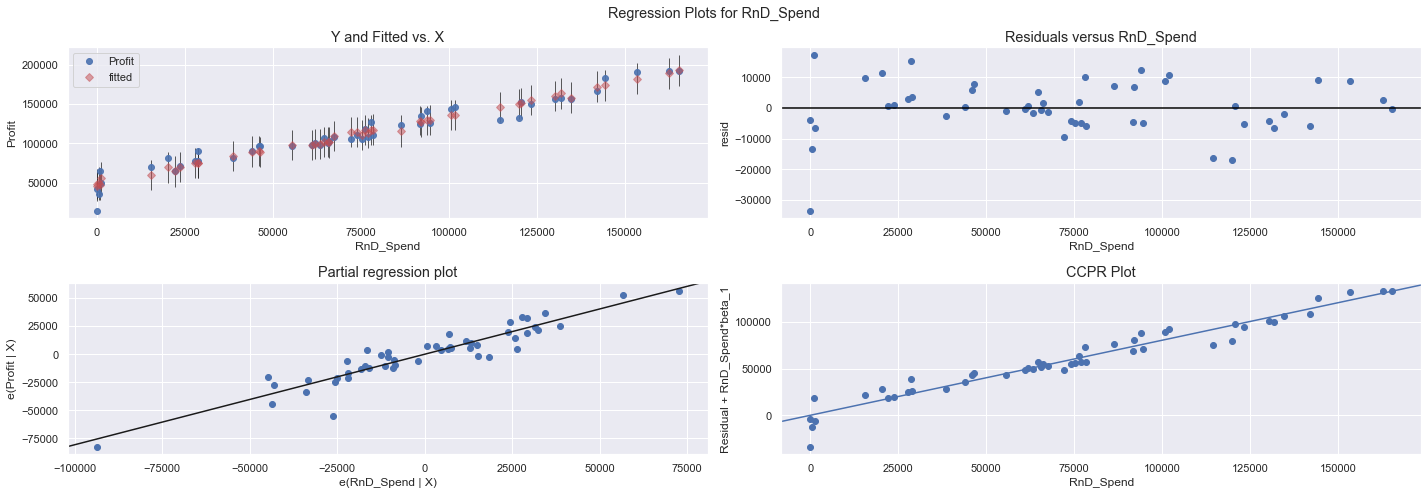

In [25]:
sm.graphics.plot_regress_exog(model,'RnD_Spend',fig=plt.figure(figsize=(20,7)))
plt.show()

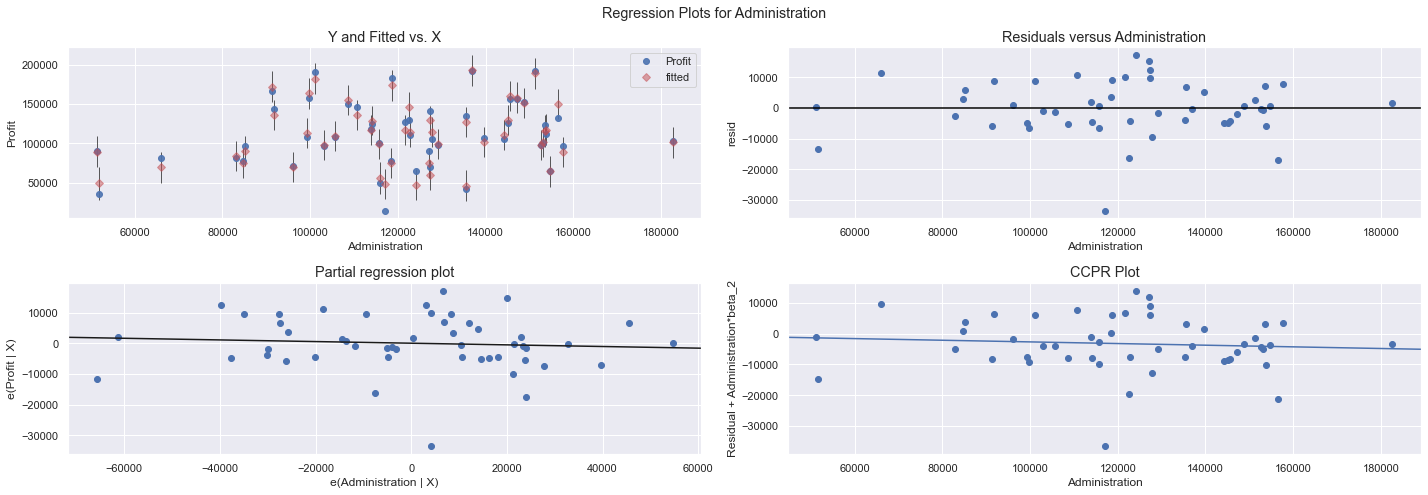

In [26]:
sm.graphics.plot_regress_exog(model,'Administration',fig=plt.figure(figsize=(20,7)))
plt.show()

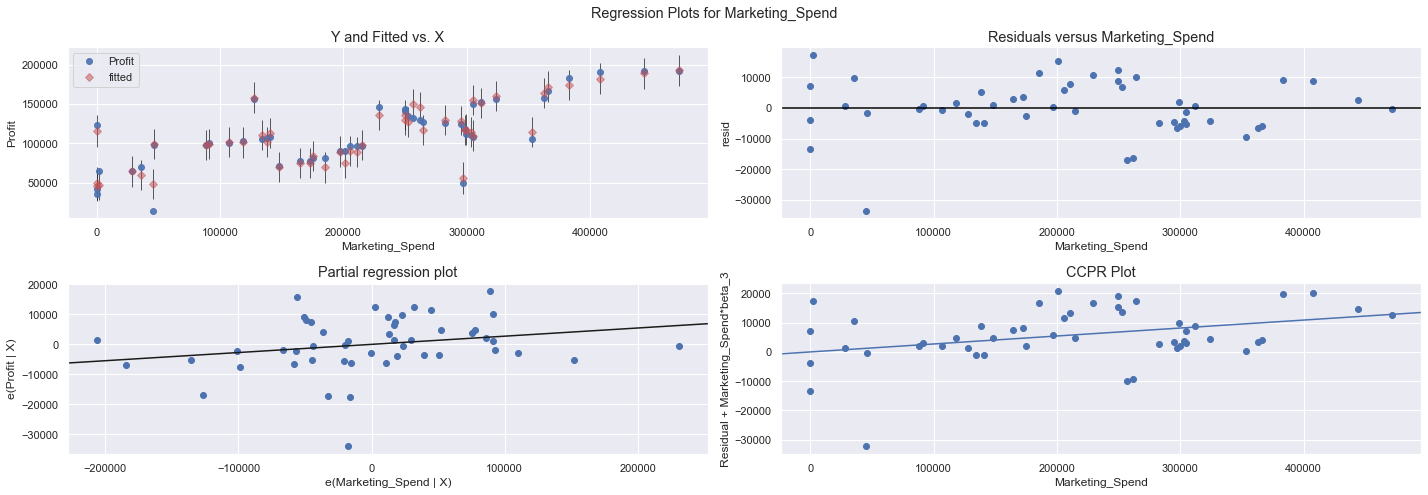

In [27]:
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=plt.figure(figsize=(20,7)))
plt.show()

### Out lier Detection

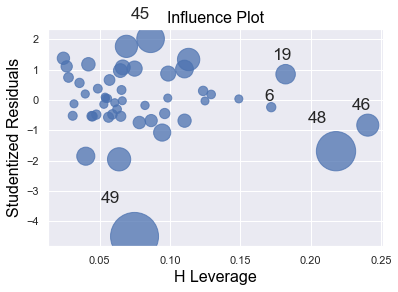

In [28]:
influence_plot(model)
plt.show()

In [29]:
(c,_) = model.get_influence().cooks_distance

In [30]:
np.max(c)

0.2880822927543263

Text(0, 0.5, 'Cooks Distance')

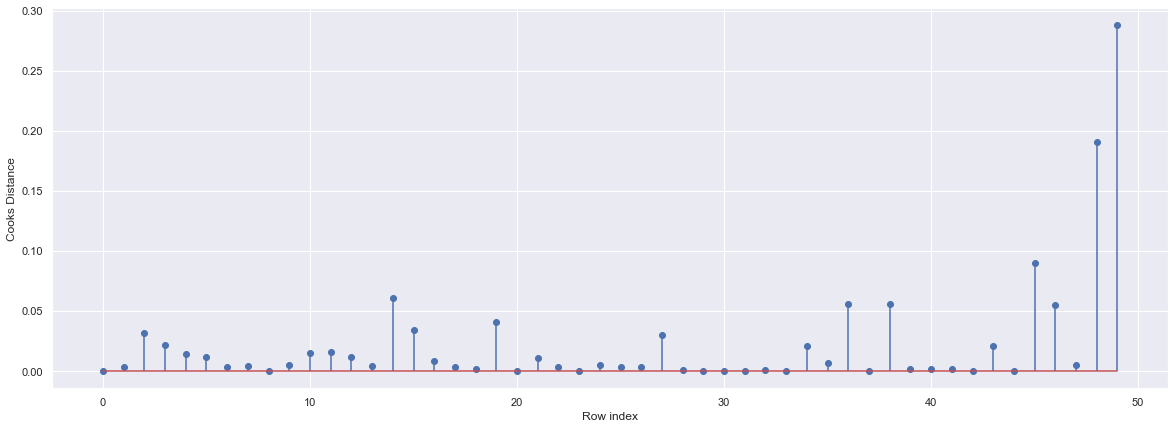

In [31]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [32]:
while np.max(c>0.1):
    startup = startup.drop(startup.index[np.argmax(c)],axis = 0).reset_index(drop=True)
    model_final = smf.ols('Profit~ RnD_Spend+Administration+Marketing_Spend',data=startup).fit()
    # new influencing points
    (c,_) = model_final.get_influence().cooks_distance
    
else:
    model_final = smf.ols('Profit~ RnD_Spend+Administration+Marketing_Spend',data=startup).fit()
    print(f'R Squared is :{model_final.rsquared}')
    print(f'aic value is :\n {model_final.aic}')

R Squared is :0.9614129113440602
aic value is :
 973.2489443962857


In [33]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.12e-30
Time:                        13:42:35   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
RnD_Spend           0.7642      0.041     18.704      0.000       0.682       0.847
Administration     -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing_Spend     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of rows
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3829787234042553

### Table Containing R^2 Value For Each Prepared Model

In [34]:
m = pd.DataFrame({'Model':['model','model_final'],'R_Squared':[model.rsquared,model_final.rsquared]})
m

,Model,R_Squared
0,model,0.950746
1,model_final,0.961413
